In [1]:
# import necessary libraries/packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df_titanic = pd.read_csv('Titanic_dataset.csv')
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.info()
# note: if '1' the passenger survived
# if '0' not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# ANALYZE THE DATASET

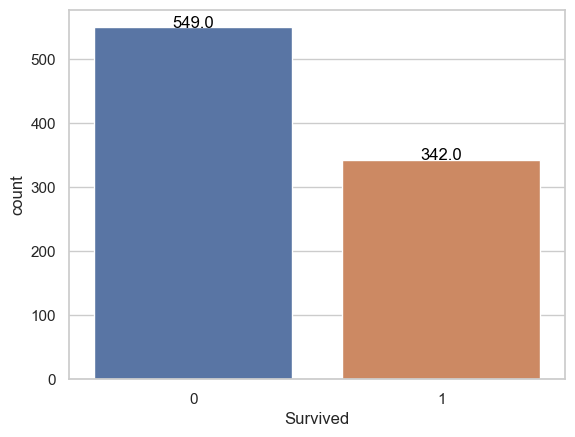

In [4]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Survived', data=df_titanic)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black')

In [5]:
# '1' if SURVIVOR '0' if NOT
total_passenger = df_titanic['PassengerId'].count()
passenger_survivors = df_titanic[df_titanic['Survived'] == 1]['PassengerId'].count()
passenger_died = df_titanic[df_titanic['Survived'] == 0]['PassengerId'].count()

In [6]:
# percentage of survivors and dead
prct_survivor = (passenger_survivors/total_passenger)*100
prct_died = (passenger_died/total_passenger)*100

print(f'People survived in the titanic accident is only {round(prct_survivor, 2)} and dead passengers are {round(prct_died, 2)}.')

People survived in the titanic accident is only 38.38 and dead passengers are 61.62.


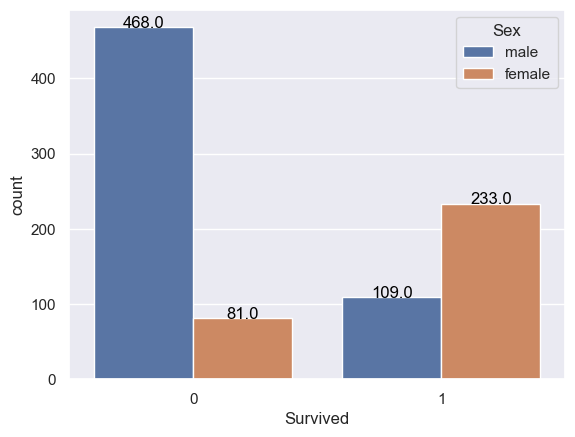

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Survived', hue='Sex', data=df_titanic)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black')

In [8]:
# percentage of survivors in men and women
men_survived = df_titanic[(df_titanic['Survived'] == 1) & (df_titanic['Sex'] == 'male')]['Survived'].count()
men_died = df_titanic[(df_titanic['Survived'] == 0) & (df_titanic['Sex'] == 'male')]['Survived'].count()
total_men_pssngr = df_titanic[df_titanic['Sex'] == 'male']['Sex'].count()

women_survived = df_titanic[(df_titanic['Survived'] == 1) & (df_titanic['Sex'] == 'female')]['Survived'].count()
women_died = df_titanic[(df_titanic['Survived'] == 0) & (df_titanic['Sex'] == 'female')]['Survived'].count()
total_women_pssngr = df_titanic[df_titanic['Sex'] == 'female']['Sex'].count()

In [9]:
# get the percentage of survivors
prct_men_survivors = (men_survived/total_men_pssngr) * 100
prct_women_survivors = (women_survived/total_women_pssngr) * 100

print(f'The rate of survivors of men "{round(prct_men_survivors, 2)}%" in the titanic is very low compare to women with "{round(prct_women_survivors, 2)}%".')

The rate of survivors of men "18.89%" in the titanic is very low compare to women with "74.2%".


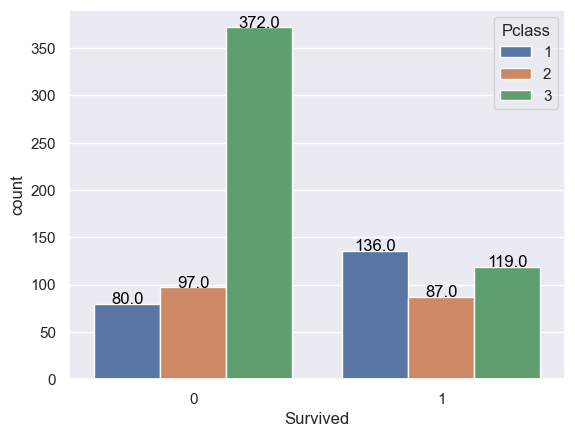

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Survived', hue='Pclass', data=df_titanic)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black')

In [11]:
# it is true and clear that the death rate of passenger in Pclass 3 is highest 
# because the location of them inside the ship
# is low compare to the other two Pclass which are above them,
# so when the ship sank the lowest part is mostly the first
# one to suffer and also because it is a 3rd class the number of lifevests, 
# surviving kit are limited compare to the other classes

<Axes: ylabel='Frequency'>

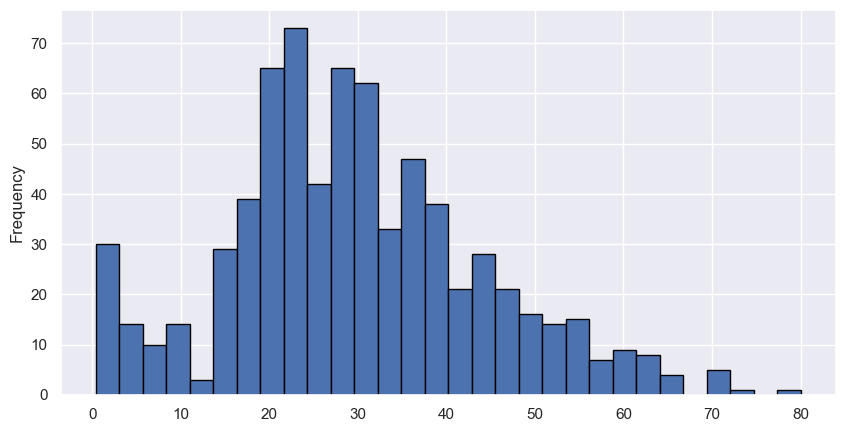

In [12]:
df_titanic['Age'].plot.hist(bins=30, edgecolor='black', figsize=(10, 5))

<Axes: ylabel='Frequency'>

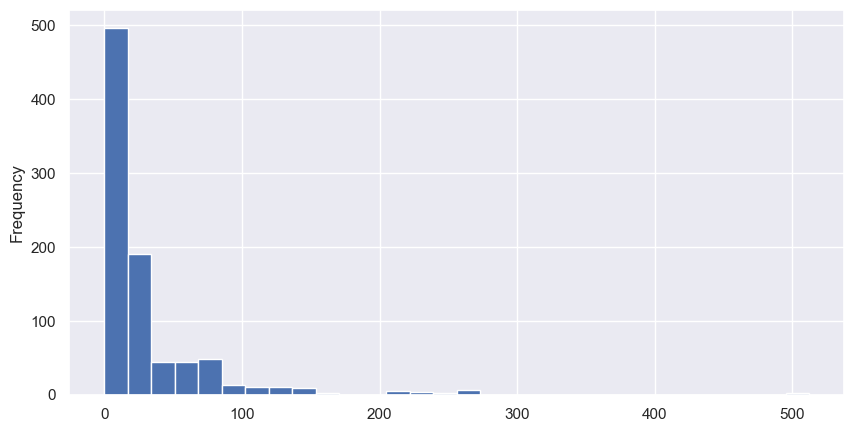

In [13]:
df_titanic['Fare'].plot.hist(bins=30, figsize=(10, 5))

In [14]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# DATA WRANGLING

In [15]:
df_titanic.columns = df_titanic.columns.str.lower()

In [16]:
df_titanic.duplicated().sum()

0

In [17]:
df_titanic.sample()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S


In [18]:
df_titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

<Axes: >

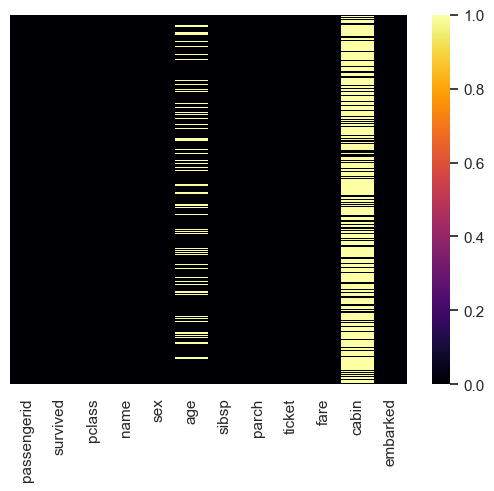

In [19]:
sns.heatmap(df_titanic.isnull(), yticklabels=False, cmap='inferno')

<Axes: xlabel='pclass', ylabel='age'>

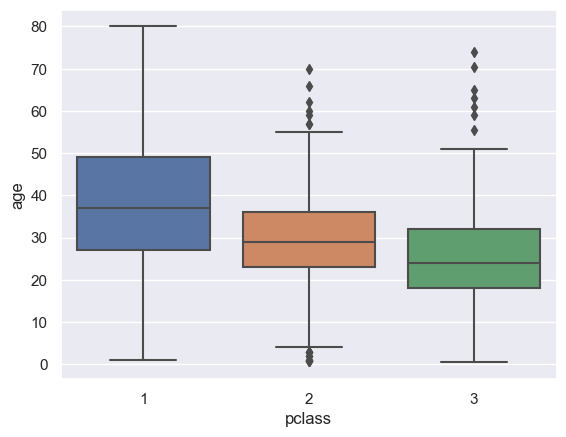

In [20]:
sns.boxplot(x='pclass', y='age', data=df_titanic)

In [21]:
df_titanic[df_titanic['embarked'].isnull() == 1]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [23]:
# common value in the embarked column with relation to their age bracket
embark_val1 = df_titanic[(df_titanic['age'] >= 30) & (df_titanic['age'] <= 40)]['embarked'].mode()[0]

# common value in the embarked column with relation to their age bracket
embark_val2 = df_titanic[(df_titanic['age'] >= 60) & (df_titanic['age'] <= 70)]['embarked'].mode()[0]

In [24]:
# fill the null values in the embarked column
val1 = df_titanic[(df_titanic['age'] == 38) & (df_titanic['embarked'].isnull() == 1)].fillna(embark_val1)
val2 = df_titanic[(df_titanic['age'] == 62) & (df_titanic['embarked'].isnull() == 1)].fillna(embark_val1)

In [25]:
df_titanic[(df_titanic['age'] == 38) & (df_titanic['embarked'].isnull() == 1)] = val1
df_titanic[(df_titanic['age'] == 62) & (df_titanic['embarked'].isnull() == 1)] = val2

In [26]:
df_titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         0
dtype: int64

#### deal with the missing values in age column by dropping them

In [27]:
# remove first the cabin column
df_titanic.drop('cabin', axis=1, inplace=True)

In [28]:
# since only the age column has still null values, removed rows that has missing values
df_titanic.dropna(inplace=True)

In [29]:
df_titanic.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [65]:
df_titanic.dtypes

passengerid    object
survived       object
pclass         object
name           object
sex            object
age            object
sibsp          object
parch          object
ticket         object
fare           object
embarked       object
dtype: object

In [68]:
df_titanic.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S


In [73]:
sex = pd.get_dummies(df_titanic['sex'], drop_first=True)
sex = sex.astype(int)
sex
###
embark = pd.get_dummies(df_titanic['embarked'], drop_first=True)
embark = embark.astype(int)
embark
###
pcl = pd.get_dummies(df_titanic['pclass'], drop_first=True)
pcl = pcl.astype(int)
pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [75]:
df_titanic = pd.concat([df_titanic, sex, embark, pcl], axis=1)

In [77]:
df_titanic.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,1,0,1,0,1


In [78]:
df_titanic.drop(['passengerid', 'pclass', 'name', 'sex', 'ticket', 'embarked'], axis=1, inplace=True)
df_titanic.head(3)

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,0,22.0,1,0,7.25,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.925,0,0,1,0,1


# TRAIN DATA FOR MODEL

In [87]:
X = df_titanic.drop('survived', axis=1)
X = X.astype(str)
y = df_titanic['survived']

In [93]:
# import lib/package for training model
from sklearn.model_selection import train_test_split

In [94]:
# set up the train and test; set the test size to 33% and the remaining 67% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [95]:
# lib/package for making the model
from sklearn.linear_model import LogisticRegression

In [96]:
# define the logistic regression model
model = LogisticRegression()

In [97]:
X_train.dtypes, y_train.dtypes

(age      object
 sibsp    object
 parch    object
 fare     object
 male     object
 Q        object
 S        object
 2        object
 3        object
 dtype: object,
 dtype('O'))

In [98]:
# fit the model
model.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
y_pred = model.predict(X_test)
y_pred

array(['0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1',
       '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0',
       '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0',
       '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0',
       '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1

In [100]:
# show report about the model
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       139
           1       0.78      0.66      0.72        97

    accuracy                           0.78       236
   macro avg       0.78      0.77      0.77       236
weighted avg       0.78      0.78      0.78       236



In [102]:
from sklearn.metrics import confusion_matrix

In [118]:
print(confusion_matrix(y_test, y_pred))

[[121  18]
 [ 33  64]]


In [104]:
# compute for accuracy
from sklearn.metrics import accuracy_score

In [122]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_prct = accuracy * 100
print(f'The accuracy of the model is {round(accuracy_prct, 2)} percent.')

The accuracy of the model is 78.39 percent.


In [121]:
# compute for precision
from sklearn.metrics import precision_score

In [133]:
precision = precision_score(y_test, y_pred, pos_label='0')
precision_prct = precision * 100
print(f'The precision of the model is {round(precision_prct, 2)} percent (for pos_label=0).')

The precision of the model is 78.57 percent (for pos_label=0).


In [134]:
precision = precision_score(y_test, y_pred, pos_label='1')
precision_prct = precision * 100
print(f'The precision of the model is {round(precision_prct, 2)} percent (for pos_label=1).')

The precision of the model is 78.05 percent (for pos_label=1).


In [135]:
# compute for recall score
from sklearn.metrics import recall_score

In [137]:
recall = recall_score(y_test, y_pred, pos_label='0')
recall_prct = recall * 100
print(f'The recall of the model is {round(recall_prct, 2)} percent (for pos_label=0).')

The recall of the model is 87.05 percent (for pos_label=0).


In [138]:
recall = recall_score(y_test, y_pred, pos_label='1')
recall_prct = recall * 100
print(f'The recall of the model is {round(recall_prct, 2)} percent (for pos_label=1).')

The recall of the model is 65.98 percent (for pos_label=1).


In [139]:
# compute for f1 score
from sklearn.metrics import f1_score

In [140]:
f1 = f1_score(y_test, y_pred, pos_label='0')
f1_prct = f1 * 100
print(f'The recall of the model is {round(f1_prct, 2)} percent (for pos_label=0).')

The recall of the model is 82.59 percent (for pos_label=0).


In [141]:
f1 = f1_score(y_test, y_pred, pos_label='1')
f1_prct = f1 * 100
print(f'The recall of the model is {round(f1_prct, 2)} percent (for pos_label=1).')

The recall of the model is 71.51 percent (for pos_label=1).


In [143]:
# save the dataframe to csv file to my machine
file_path = 'C:\\Users\\User\Downloads\Processed_Titanic_Dataset.csv'

try:
    df_titanic.to_csv(file_path, index=False)
    print(f"File '{file_path}' saved successfully.")
except Exception as e:
    print(f"Error saving file: {e}")

File 'C:\Users\User\Downloads\Processed_Titanic_Dataset.csv' saved successfully.
